## Process HPC files for performance matrix

In [7]:
import openml
import pandas as pd
import numpy as np

In [8]:
def process_hpc_file(file):
    lines = []
    with open(file, "r") as f:
        data = f.readlines()
    for line in data:
        if line.startswith("INFO:root") and (not "https" in line and not "fallback" in line and not "sklearn.utils" in line):
            lines.append(line)
    ids = set()
    results = []
    for line in lines:
        items = "".join(line.replace("INFO:root:", "")).replace("in", "").replace("seconds", "").strip().split(",")
        dataset_id, pipeline = int(items[0]), int(items[1].strip())
        remainder = items[2].strip().split(" ")
        score, time = float(remainder[0]), float(remainder[2])
        ids.add(dataset_id)
        results.append([dataset_id, pipeline, score, time])
    
    df = pd.DataFrame(index = list(ids), columns = range(250))
    df_time = pd.DataFrame(index = list(ids), columns = range(250))
    for result in results:
        df_time.loc[result[0], result[1]] = result[3]
        time_result = df_time.loc[result[0], result[1]]
        if time_result > 900:
            df.loc[result[0], result[1]] = None
        else:
            df.loc[result[0], result[1]] = result[2]
    
    return df

In [51]:
df_first = process_hpc_file("hpc_output/bin/slurm-118181.out")
df_second = process_hpc_file("hpc_output/bin/slurm-118191.out")
df_third = process_hpc_file("hpc_output/bin/slurm-118234.out")
df_fourth = process_hpc_file("hpc_output/bin/slurm-118274.out")
df_fifth = process_hpc_file("hpc_output/bin/slurm-118275.out")
df_sixth = process_hpc_file("hpc_output/bin/slurm-118368.out")
df_seventh = process_hpc_file("hpc_output/bin/slurm-118369.out")
df_eighth = process_hpc_file("hpc_output/bin/slurm-118417.out")
df_ninth = process_hpc_file("hpc_output/bin/slurm-118523.out")
df_tenth = process_hpc_file("hpc_output/bin/slurm-118553.out")
df_eleventh = process_hpc_file("hpc_output/bin/slurm-118573.out")
df_additional = process_hpc_file("hpc_output/bin/slurm-118421_additional.out")

In [52]:
data_so_far = pd.concat([
    df_first, 
    df_second, 
    df_third,
    df_fourth,
    df_fifth,
    df_sixth,
    df_seventh,
    df_eighth,
    df_ninth,
    df_tenth,
    df_eleventh], axis = 0)

In [161]:
first = process_hpc_file("hpc_output/multi/slurm-118693.out")
second = process_hpc_file("hpc_output/multi/slurm-118694.out")
third = process_hpc_file("hpc_output/multi/slurm-118765.out")
fourth = process_hpc_file("hpc_output/multi/slurm-118767.out")
fifth = process_hpc_file("hpc_output/multi/slurm-118873.out")
sixth = process_hpc_file("hpc_output/multi/slurm-118874.out")
seventh = process_hpc_file("hpc_output/multi/slurm-118991.out")
eighth = process_hpc_file("hpc_output/multi/slurm-118992.out")
ninth = process_hpc_file("hpc_output/multi/slurm-119140.out")
tenth = process_hpc_file("hpc_output/multi/slurm-119141.out")


In [165]:
data_multi = pd.concat([
    first,
    second,
    third,
    fourth,
    fifth,
    sixth,
    seventh,
    eighth,
    ninth,
    tenth], axis = 0)*-1

In [167]:
def min_max_scaling(
    row
):
    return (row - row.min()) / (row.max() - row.min())

for row in data_multi.index:
    data_multi.loc[row] = min_max_scaling(data_multi.loc[row])

In [170]:
candidate_pipelines = pd.read_csv("SBPort/training/candidate_pipelines/candidate_pipelines_multi.csv")
data_multi.columns = candidate_pipelines["pipelines"].values
data_multi.to_csv("SBPort/training/performance_matrices/performance_matrix_multi.csv")

In [171]:
data_multi

,"Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',FeatureAgglomeration(affinity='l1',linkage='complete')),('1',SelectFwe(alpha=0.017)),('0',GradientBoostingClassifier(learning_rate=0.5,max_depth=5,max_features=0.2,min_samples_leaf=13,min_samples_split=6,subsample=0.2))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',RandomForestClassifier(bootstrap=False,max_features=0.2,min_samples_leaf=2))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesClassifier(max_features=0.55,min_samples_leaf=20,min_samples_split=3))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',MaxAbsScaler()),('0',ExtraTreesClassifier(max_features=0.8,min_samples_leaf=2,min_samples_split=16))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',RandomForestClassifier(max_features=0.2,min_samples_leaf=14,min_samples_split=4))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=10,max_features=0.05,min_samples_leaf=13,min_samples_split=17))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',SelectPercentile(percentile=66)),('0',RandomForestClassifier(bootstrap=False,max_features=0.15000000000000002,min_samples_leaf=2,min_samples_split=6))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesClassifier(criterion='entropy',max_features=0.55,min_samples_leaf=2,min_samples_split=12))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',SelectPercentile(percentile=55)),('0',RandomForestClassifier(max_features=0.35000000000000003,min_samples_leaf=7,min_samples_split=15))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=6,max_features=0.8,min_samples_leaf=5,min_samples_split=12,subsample=0.7500000000000001))])",...,"Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',StandardScaler()),('0',RandomForestClassifier(bootstrap=False,max_features=0.15000000000000002,min_samples_leaf=7,min_samples_split=14))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',SelectFwe(alpha=0.032)),('0',GradientBoostingClassifier(learning_rate=0.5,max_depth=1,max_features=0.15000000000000002,min_samples_leaf=16,min_samples_split=6,subsample=0.7000000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',MaxAbsScaler()),('1',MaxAbsScaler()),('0',RandomForestClassifier(criterion='entropy',max_features=0.8,min_samples_leaf=13,min_samples_split=3))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Normalizer(norm='l1')),('1',MinMaxScaler()),('0',ExtraTreesClassifier(criterion='entropy',max_features=0.8500000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',MinMaxScaler()),('0',GradientBoostingClassifier(max_depth=6,max_features=0.25,min_samples_leaf=16,min_samples_split=9,subsample=0.6000000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',LogisticRegression(C=0.5))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',RobustScaler()),('0',GradientBoostingClassifier(max_depth=6,max_features=0.25,min_samples_leaf=16,min_samples_split=9,subsample=0.6000000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',MinMaxScaler()),('0',ExtraTreesClassifier(max_features=0.8,min_samples_leaf=2,min_samples_split=5))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',MaxAbsScaler()),('1',PolynomialFeatures(include_bias=False)),('0',ExtraTreesClassifier(max_features=0.1,min_samples_leaf=3,min_samples_split=16))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',RobustScaler()),('0',ExtraTreesClassifier(criterion='entropy',max_features=0.9000000000000001))])"
185,0.741236,0.000579,0.001466,0.000196,0.00101,0.00166,0.002181,0.000136,0.00097,0.00645,...,0.

In [172]:
first = process_hpc_file("hpc_output/regr/regr_perf_matrix_p1.out")
second = process_hpc_file("hpc_output/regr/regr_perf_matrix_p2.out")
third = process_hpc_file("hpc_output/regr/regr_perf_matrix_p3.out")
fourth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p4.out")
fifth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p5.out")
sixth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p6.out")
seventh = process_hpc_file("hpc_output/regr/regr_perf_matrix_p7.out")
eighth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p8.out")
ninth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p9.out")
tenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p10.out")
eleventh = process_hpc_file("hpc_output/regr/regr_perf_matrix_p11.out")
twelveth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p12.out")
thirteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p13.out")
fourteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p14.out")
fifteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p15.out")
sixteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p16.out")
seventeenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p17.out")
eighteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p18.out")


In [173]:
data_regr = pd.concat([
    first,
    second,
    third,
    fourth,
    fifth,
    sixth,
    seventh,
    eighth,
    ninth,
    tenth,
    eleventh,
    twelveth,
    thirteenth,
    fourteenth,
    fifteenth,
    sixteenth,
    seventeenth,
    eighteenth], axis = 0)

In [174]:
candidate_pipelines = pd.read_csv("SBPort/training/candidate_pipelines/candidate_pipelines_regr.csv")

In [175]:
data_regr.columns = candidate_pipelines["pipelines"].values

In [106]:
data_regr.max(axis = 0)

0       96360.191593
1       93944.130583
2       92295.751773
3      312603.816572
4      316797.012084
           ...      
245     86465.943486
246    113446.535834
247     92778.846304
248    101084.272073
249    106406.612058
Length: 250, dtype: object

In [176]:
def min_max_scaling(
    row
):
    return (row - row.min()) / (row.max() - row.min())


for row in data_regr.index:
    data_regr.loc[row] = min_max_scaling(data_regr.loc[row])

In [177]:
data_regr

,"Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(max_features=0.25,min_samples_leaf=3,min_samples_split=5))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',StandardScaler()),('0',RandomForestRegressor(bootstrap=False,max_features=0.55,min_samples_leaf=6,min_samples_split=5))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',PolynomialFeatures(include_bias=False)),('0',RandomForestRegressor(max_features=0.3,min_samples_split=20))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',PolynomialFeatures(include_bias=False)),('1',FeatureAgglomeration(affinity='l2',linkage='complete')),('0',ElasticNetCV(l1_ratio=0.9500000000000001,tol=0.001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',SelectPercentile(percentile=99,score_func=f_regression)),('1',Normalizer(norm='l1')),('0',DecisionTreeRegressor(max_depth=2,min_samples_leaf=14,min_samples_split=9))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingRegressor(alpha=0.99,loss='huber',max_depth=9,max_features=1.0,min_samples_leaf=5,min_samples_split=7,subsample=0.8500000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',MaxAbsScaler()),('1',MinMaxScaler()),('0',ExtraTreesRegressor(max_features=0.9000000000000001,min_samples_leaf=12,min_samples_split=15))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Nystroem(gamma=0.4,kernel='linear',n_components=9)),('1',SelectFwe(alpha=0.017,score_func=f_regression)),('0',LinearSVR(C=0.1,dual=False,epsilon=0.001,loss='squared_epsilon_insensitive',tol=0.01))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Normalizer(norm='max')),('1',Binarizer(threshold=0.4)),('0',DecisionTreeRegressor(max_depth=2,min_samples_leaf=6,min_samples_split=14))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(max_features=0.05,min_samples_leaf=2,min_samples_split=8))])",...,"Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',SelectPercentile(percentile=24,score_func=f_regression)),('1',MaxAbsScaler()),('0',ElasticNetCV(l1_ratio=0.15000000000000002,tol=0.001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(bootstrap=True,max_features=0.4,min_samples_split=17))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(bootstrap=True,max_features=0.55,min_samples_leaf=2,min_samples_split=7))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Binarizer(threshold=0.7000000000000001)),('1',MinMaxScaler()),('0',AdaBoostRegressor(learning_rate=0.1,loss='exponential',n_estimators=100))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',RobustScaler()),('0',ExtraTreesRegressor(max_features=0.45,min_samples_split=10))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingRegressor(alpha=0.95,max_depth=7,max_features=0.45,min_samples_leaf=2,min_samples_split=11,subsample=0.9500000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',PCA(iterated_power=9,svd_solver='randomized')),('1',RobustScaler()),('0',KNeighborsRegressor(n_neighbors=6,p=1))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',RandomForestRegressor(bootstrap=False,max_features=0.6000000000000001,min_samples_leaf=3,min_samples_split=12))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(max_features=0.9000000000000001,min_samples_leaf=7,min_samples_split=9))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',RobustScaler()),('1',MinMaxScaler()),('0',RandomForestRegressor(max_features=0.3,min_samples_leaf=19,min_samples_split=13))])"
8,0.197086,0.074693,0.109368,0.275684,0.431546,0.312322,0.070288,0.23389,0.295084,0.171137,...,0.

In [151]:
data_regr.to_csv("SBPort/training/performance_matrices/performance_matrix_regr.csv")

In [119]:
from clustering import MetaOPTICS
meta_features = pd.read_csv("SBPort/training/raw_metafeatures/metafeatures_regr.csv", index_col = 0)

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_features_with_outliers = [
        "cov_mean", "cov_sd", "iqr_mean", "iqr_sd", "max_mean", "max_sd", "mean_mean", "mean_sd", "median_mean", 
        "median_sd", "min_mean", "min_sd", "sd_mean", "sd_sd", "variance_mean", "variance_sd"
        ]

numerical_features_norm = list(set(meta_features.columns) - set(numerical_features_with_outliers))

numerical_transformer_normal = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy = "mean")),
            ("scaler", MinMaxScaler())
        ]
    )

numerical_transformer_outliers = Pipeline(
steps=[
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
]
)

preprocessor = ColumnTransformer(
transformers=[
    ("num_outliers", numerical_transformer_outliers, numerical_features_with_outliers),
    ("num", numerical_transformer_normal, numerical_features_norm),

]
)
preprocessor.fit(meta_features)


ColumnTransformer(transformers=[('num_outliers',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['cov_mean', 'cov_sd', 'iqr_mean', 'iqr_sd',
                                  'max_mean', 'max_sd', 'mean_mean', 'mean_sd',
                                  'median_mean', 'median_sd', 'min_mean',
                                  'min_sd', 'sd_mean', 'sd_sd', 'variance_mean',
                                  'variance_sd']),
                                ('num',
                                 Pipeline(steps=[('imputer...
                                  'bayesian_ridge_mean', 'linear_regr_mean',
                                  'cor_sd', 'skewness_target', 'skewness_mean',
                                  'target_corr_sd', 'target_corr_mean',
                                  'cor_mean', 'kurtosis_mean', 'outliers',
                                  'best_node_mean', 'skewness_sd', 'nr_cat',
                                  'random_node_mean', 'nr_inst', 'missing_mean',
                                  'num_to_cat_ratio', 'attr_to_inst_ratio',
                                  'nr_num', 'worst_node_mean', 'nr_feat',
                                  'attr_entropy_mean', 'attr_conc_mean',
                                  'kurtosis_target'])])

In [123]:
transformed_mf = preprocessor.transform(meta_features)

(202, 46)

In [142]:
clf = MetaOPTICS(
    transformed_mf,
    eps = 0.5,
    min_samples = 10
)

clf.fit(transformed_mf)

MetaOPTICS(eps=0.5,
           mf_dataframe=array([[-0.07053456, -0.07053456, -0.07053554, ...,  0.30060728,
         0.16442177,  0.01345199],
       [-0.07053456, -0.07053456, -0.07053554, ...,  0.30060728,
         0.16442177,  0.00352536],
       [-0.07053456, -0.07053456, -0.07053553, ...,  0.30060728,
         0.16442177,  0.00283373],
       ...,
       [-0.07053456, -0.07053456, -0.07053546, ...,  0.20325657,
         0.00034669,  0.00037374],
       [-0.07053456, -0.07053456, -0.07046553, ...,  0.12255891,
         0.15941502,  0.        ],
       [-0.07053456, -0.07053456, -0.07053552, ...,  0.17700411,
         0.00224646,  0.01018988]]),
           min_samples=10)

In [143]:
import numpy as np

labels, count = np.unique(clf.labels_, return_counts = True)

In [154]:
import pandas as pd

performance_matrix_multi = pd.read_csv("SBPort/training/performance_matrices/performance_matrix_multi.csv", index_col = 0)

In [159]:
performance_matrix_multi.mean(axis = 0).sort_values(ascending = False)

Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=5,max_features=1.0,min_samples_leaf=5,min_samples_split=12,subsample=0.7500000000000001))])                                                                                                                   0.965296
Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=6,max_features=1.0,min_samples_leaf=5,min_samples_split=12,subsample=0.7500000000000001))])                                                                                                                   0.963162
Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=6,max_features=0.8,min_samples_leaf=5,min_samples_split=12,subsample=0.7500000000000001))])                                                                                                                   0.962181
Pipeline(steps=[('imputation',SimpleI

## Convient way to print out automl benchmark ids & names

In [1]:
import openml
from sklearn.model_selection import train_test_split
all_datasets = openml.datasets.list_datasets()
automl_dids = openml.study.get_suite(271).data
binary_automlbench_dids = [did for did in automl_dids if (all_datasets[did]["NumberOfClasses"] == 2 and all_datasets[did]["NumberOfInstances"]*all_datasets[did]["NumberOfFeatures"] < 10_000_000 and all_datasets[did]["NumberOfInstances"] < 500_000)]
multi_automlbench_dids = [did for did in automl_dids if (all_datasets[did]["NumberOfClasses"] > 2 and all_datasets[did]["NumberOfInstances"]*all_datasets[did]["NumberOfFeatures"] < 10_000_000 and all_datasets[did]["NumberOfInstances"] < 500_000)]
binary_validation, binary_test = train_test_split(binary_automlbench_dids, train_size = 0.33, random_state = 42)
multi_validation, multi_test = train_test_split(multi_automlbench_dids, train_size = 0.33, random_state = 42)
binary_test.remove(41157)

In [2]:
regr_dids = openml.study.get_suite(269).data
regr_automlbench_dids = [did for did in regr_dids if (all_datasets[did]["NumberOfInstances"]*all_datasets[did]["NumberOfFeatures"] < 10_000_000 and all_datasets[did]["NumberOfInstances"] < 500_000)]
regr_val, regr_test = train_test_split(regr_automlbench_dids, train_size = 0.33, random_state = 42)
regr_test.remove(3050)
regr_test.remove(3277)

In [11]:
for id in regr_test:
    dataset = openml.datasets.get_dataset(id)
    X, y, categorical_indicator, attribute_names = dataset.get_data(
        dataset_format="array", target=dataset.default_target_attribute
    )
    if "sparse" in dataset.format.lower():
        print(id)

3050


3277


In [5]:
for did in binary_test:
    print(did, all_datasets[did]["name"], all_datasets[did]["NumberOfInstances"], all_datasets[did]["NumberOfFeatures"])

1590 adult 48842.0 15.0
1067 kc1 2109.0 22.0
40900 Satellite 5100.0 37.0
40978 Internet-Advertisements 3279.0 1559.0
41144 madeline 3140.0 260.0
41145 philippine 5832.0 309.0
41162 kick 72983.0 33.0
4135 Amazon_employee_access 32769.0 10.0
1464 blood-transfusion-service-center 748.0 5.0
40981 Australian 690.0 15.0
31 credit-g 1000.0 21.0
3 kr-vs-kp 3196.0 37.0
41143 jasmine 2984.0 145.0
1494 qsar-biodeg 1055.0 42.0
41142 christine 5418.0 1637.0
40983 wilt 4839.0 6.0
23517 numerai28.6 96320.0 22.0
1486 nomao 34465.0 119.0
1489 phoneme 5404.0 6.0
41146 sylvine 5124.0 21.0


In [ ]:
41021, 42688, 42726, 451, 42570, 4272, 42563

In [3]:
for did in multi_test[-6:]:
    print(did, all_datasets[did]["name"], all_datasets[did]["NumberOfInstances"], all_datasets[did]["NumberOfFeatures"])

41168 jannis 83733.0 55.0
40668 connect-4 67557.0 43.0
40984 segment 2310.0 20.0
41027 jungle_chess_2pcs_raw_endgame_complete 44819.0 7.0
40498 wine-quality-white 4898.0 12.0
41164 fabert 8237.0 801.0


In [21]:
len(binary_test)

21

In [10]:
for did in regr_automlbench_dids:
    print(all_datasets[did]["name"])

Moneyball
diamonds
Mercedes_Benz_Greener_Manufacturing
quake
sensory
socmob
space_ga
tecator
wine_quality
elevators
black_friday
Brazilian_houses
topo_2_1
yprop_4_1
OnlineNewsPopularity
colleges
abalone
us_crime
pol
SAT11-HAND-runtime-regression
house_sales
boston
house_prices_nominal
house_16H
QSAR-TID-11
QSAR-TID-10980
MIP-2016-regression


## GAMA time plot 

In [18]:
import pandas as pd
from pathlib import Path
import numpy as np
init_df = pd.DataFrame(index = regr_test, columns = ["10_min", "60_min", "10_min_ws", "60_min_ws"])

In [19]:
task = "regr"
path_no_ws_10 = Path(f"SBPort/results/gama_no_ws/{task}/10_min/")
path_no_ws_60 = Path(f"SBPort/results/gama_no_ws/{task}/60_min/")
path_ws_10 = Path(f"SBPort/results/gama_ws/{task}/10_min/")
path_ws_60 = Path(f"SBPort/results/gama_ws/{task}/60_min/")

def get_score(path: Path, column_name: str):
    for dir in path.iterdir():
        name = dir.name.replace("_ws","")
        print(name)
        dataset_id = int(name[:-6].split("_")[-1])
        try:
            current_file = pd.read_csv(f"{dir}/evaluations.log", sep = ";", index_col = 0)
            current_file["score"] = current_file["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)
            init_df.loc[dataset_id, column_name] = current_file["score"].max()
            print(dir, current_file["score"].max())
        except Exception as e:
            print(f"error on {dir}")

In [20]:
get_score(path_no_ws_10, "10_min")
get_score(path_no_ws_60, "60_min")
get_score(path_ws_10, "10_min_ws")
get_score(path_ws_60, "60_min_ws")


gama_logs_42726_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_42726_10.0_ -2.07326135220942
gama_logs_41021_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_41021_10.0_ -21.271697383810125
gama_logs_422_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_422_10.0_ -0.02884472120748536
gama_logs_42688_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_42688_10.0_ -1844.120193765007
gama_logs_216_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_216_10.0_ -0.002494290981569077
gama_logs_531_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_531_10.0_ -4.989595995372083
gama_logs_42563_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_42563_10.0_ -25697.765826634724
gama_logs_42727_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_42727_10.0_ -0.15090846884469863
gama_logs_42225_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_42225_10.0_ -1106.0775020685433
gama_logs_42570_10.0_
SBPort/results/gama_no_ws/regr/10_min/gama_logs_42570_10.0_ -8.280767955

In [21]:
init_df

,10_min,60_min,10_min_ws,60_min_ws
287,-0.723492,-0.721097,-0.722602,-0.723707
416,-0.028548,-0.028492,-0.028997,-0.02854
216,-0.002494,-0.00216,-0.00236,-0.00229
531,-4.989596,-3.755377,-3.892941,-4.058812
41021,-21.271697,-21.232553,-21.390523,-21.151408
42688,-1844.120194,-5.140092,-5.142486,-5.140158
42726,-2.073261,-2.066086,-2.081072,-2.067471
42730,-0.133131,-0.131961,-0.134274,-0.132405
422,-0.028845,-0.028812,-0.029065,-0.029042
42225,-1106.077502,-1113.3382,-1310.649137,-1177.290506


/tmp/ipykernel_9336/2564919944.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_ws_10 = no_ws_10.resample('2T').mean()
/tmp/ipykernel_9336/2564919944.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_ws_60 = no_ws_60.resample('2T').mean()
/tmp/ipykernel_9336/2564919944.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ws_10 = ws_10.resample('2T').mean()
/tmp/ipykernel_9336/2564919944.py:30: FutureWarni

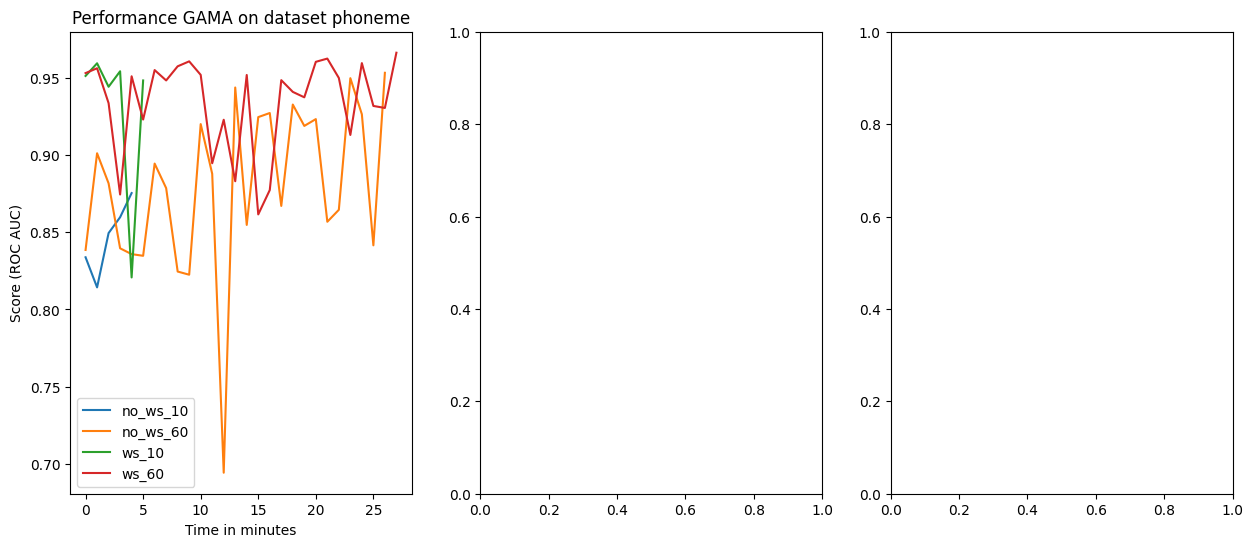

In [195]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))

dataset_id = 40978
task = "bin"
no_ws_10 = pd.read_csv(Path(f"SBPort/results/gama_no_ws/{task}/10_min/gama_logs_{dataset_id}_10.0_/evaluations.log"), sep = ";")
no_ws_10["score"] = no_ws_10["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

no_ws_60 = pd.read_csv(Path(f"SBPort/results/gama_no_ws/{task}/60_min/gama_logs_{dataset_id}_60.0_/evaluations.log"), sep = ";")
no_ws_60["score"] = no_ws_60["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)
ws_10 = pd.read_csv(Path(f"SBPort/results/gama_ws/{task}/10_min/gama_logs_{dataset_id}_10.0__ws/evaluations.log"), sep = ";")
ws_10["score"] = ws_10["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

ws_60 = pd.read_csv(Path(f"SBPort/results/gama_ws/{task}/60_min/gama_logs_{dataset_id}_60.0__ws/evaluations.log"), sep = ";")
ws_60["score"] = ws_60["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

no_ws_10["t_start"] = pd.to_datetime(no_ws_10["t_start"])
no_ws_10.set_index('t_start', inplace= True)
no_ws_10 = no_ws_10.resample('2T').mean()

no_ws_60["t_start"] = pd.to_datetime(no_ws_60["t_start"])
no_ws_60.set_index('t_start', inplace= True)
no_ws_60 = no_ws_60.resample('2T').mean()

ws_10["t_start"] = pd.to_datetime(ws_10["t_start"])
ws_10.set_index('t_start', inplace= True)
ws_10 = ws_10.resample('2T').mean()

ws_60["t_start"] = pd.to_datetime(ws_60["t_start"])
ws_60.set_index('t_start', inplace= True)
ws_60 = ws_60.resample('2T').mean()

ax1.plot(no_ws_10["score"].values, label = "no_ws_10")
ax1.plot(no_ws_60["score"].values, label = "no_ws_60")
ax1.plot(ws_10["score"].values, label = "ws_10")
ax1.plot(ws_60["score"].values, label = "ws_60")
ax1.set_xlabel("Time in minutes")
ax1.set_ylabel("Score (ROC AUC)")
ax1.set_title("Performance GAMA on dataset phoneme")
ax1.legend()

/tmp/ipykernel_9336/1211828978.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_ws_10 = no_ws_10.resample('2T').mean()
/tmp/ipykernel_9336/1211828978.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_ws_60 = no_ws_60.resample('2T').mean()
/tmp/ipykernel_9336/1211828978.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ws_10 = ws_10.resample('2T').mean()
/tmp/ipykernel_9336/1211828978.py:32: FutureWarni

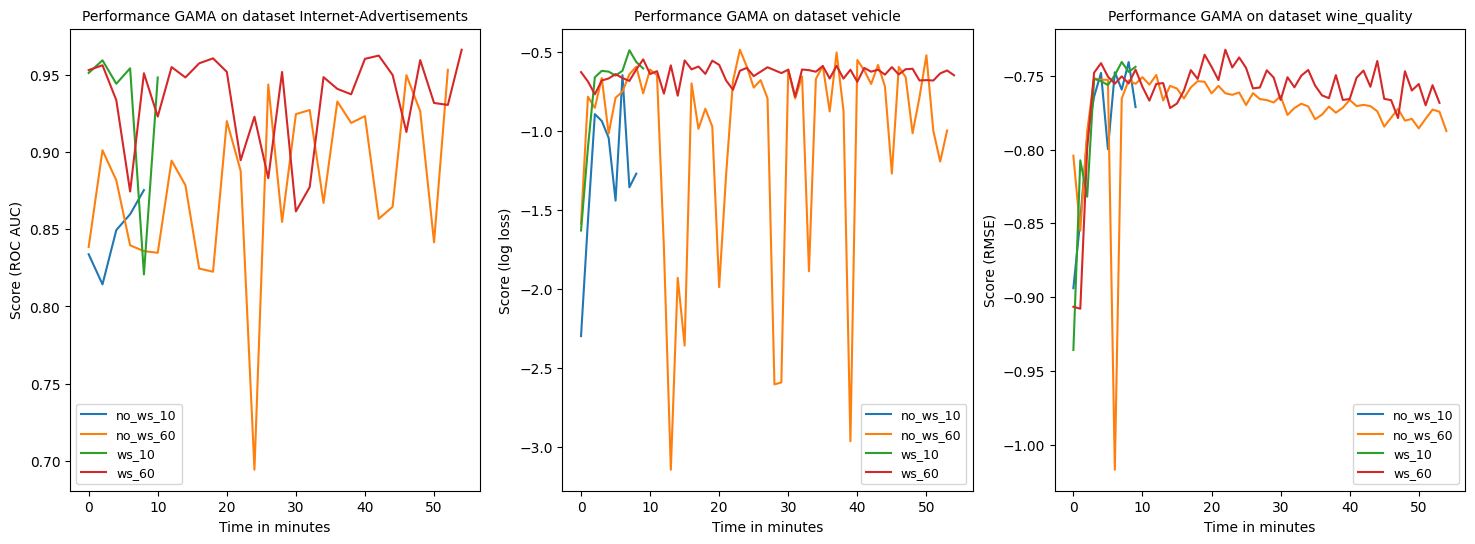

In [219]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6))

dataset_id = 40978
task = "bin"
no_ws_10 = pd.read_csv(Path(f"SBPort/results/gama_no_ws/{task}/10_min/gama_logs_{dataset_id}_10.0_/evaluations.log"), sep = ";")
no_ws_10["score"] = no_ws_10["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

no_ws_60 = pd.read_csv(Path(f"SBPort/results/gama_no_ws/{task}/60_min/gama_logs_{dataset_id}_60.0_/evaluations.log"), sep = ";")
no_ws_60["score"] = no_ws_60["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)
ws_10 = pd.read_csv(Path(f"SBPort/results/gama_ws/{task}/10_min/gama_logs_{dataset_id}_10.0__ws/evaluations.log"), sep = ";")
ws_10["score"] = ws_10["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

ws_60 = pd.read_csv(Path(f"SBPort/results/gama_ws/{task}/60_min/gama_logs_{dataset_id}_60.0__ws/evaluations.log"), sep = ";")
ws_60["score"] = ws_60["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

no_ws_10["t_start"] = pd.to_datetime(no_ws_10["t_start"])
no_ws_10.set_index('t_start', inplace= True)
no_ws_10 = no_ws_10.resample('2T').mean()

no_ws_60["t_start"] = pd.to_datetime(no_ws_60["t_start"])
no_ws_60.set_index('t_start', inplace= True)
no_ws_60 = no_ws_60.resample('2T').mean()

ws_10["t_start"] = pd.to_datetime(ws_10["t_start"])
ws_10.set_index('t_start', inplace= True)
ws_10 = ws_10.resample('2T').mean()

ws_60["t_start"] = pd.to_datetime(ws_60["t_start"])
ws_60.set_index('t_start', inplace= True)
ws_60 = ws_60.resample('2T').mean()

ax1.plot(no_ws_10["score"].values, label = "no_ws_10")
ax1.plot(no_ws_60["score"].values, label = "no_ws_60")
ax1.plot(ws_10["score"].values, label = "ws_10")
ax1.plot(ws_60["score"].values, label = "ws_60")
ax1.set_xlabel("Time in minutes")
ax1.set_ylabel("Score (ROC AUC)")
ax1.set_title("Performance GAMA on dataset Internet-Advertisements", fontsize = 10)
ax1.set_xticklabels([0, 0, 10, 20, 30, 40, 50, 60])
ax1.legend(fontsize = 9)

dataset_id = 54
task = "multi"
no_ws_10 = pd.read_csv(Path(f"SBPort/results/gama_no_ws/{task}/10_min/gama_logs_{dataset_id}_10.0_/evaluations.log"), sep = ";")
no_ws_10["score"] = no_ws_10["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

no_ws_60 = pd.read_csv(Path(f"SBPort/results/gama_no_ws/{task}/60_min/gama_logs_{dataset_id}_60.0_/evaluations.log"), sep = ";")
no_ws_60["score"] = no_ws_60["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)
ws_10 = pd.read_csv(Path(f"SBPort/results/gama_ws/{task}/10_min/gama_logs_{dataset_id}_10.0__ws/evaluations.log"), sep = ";")
ws_10["score"] = ws_10["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

ws_60 = pd.read_csv(Path(f"SBPort/results/gama_ws/{task}/60_min/gama_logs_{dataset_id}_60.0__ws/evaluations.log"), sep = ";")
ws_60["score"] = ws_60["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

no_ws_10["t_start"] = pd.to_datetime(no_ws_10["t_start"])
no_ws_10.set_index('t_start', inplace= True)
no_ws_10 = no_ws_10.resample('1T').mean()

no_ws_60["t_start"] = pd.to_datetime(no_ws_60["t_start"])
no_ws_60.set_index('t_start', inplace= True)
no_ws_60 = no_ws_60.resample('1T').mean()

ws_10["t_start"] = pd.to_datetime(ws_10["t_start"])
ws_10.set_index('t_start', inplace= True)
ws_10 = ws_10.resample('1T').mean()

ws_60["t_start"] = pd.to_datetime(ws_60["t_start"])
ws_60.set_index('t_start', inplace= True)
ws_60 = ws_60.resample('1T').mean()

ax2.plot(no_ws_10["score"].values, label = "no_ws_10")
ax2.plot(no_ws_60["score"].values, label = "no_ws_60")
ax2.plot(ws_10["score"].values, label = "ws_10")
ax2.plot(ws_60["score"].values, label = "ws_60")
ax2.set_xlabel("Time in minutes")
ax2.set_ylabel("Score (log loss)")
ax2.set_title("Performance GAMA on dataset vehicle", fontsize = 10)
ax2.legend(loc = "lower right", fontsize = 9)

dataset_id = 287
task = "regr"
no_ws_10 = pd.read_csv(Path(f"SBPort/results/gama_no_ws/{task}/10_min/gama_logs_{dataset_id}_10.0_/evaluations.log"), sep = ";")
no_ws_10["score"] = no_ws_10["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

no_ws_60 = pd.read_csv(Path(f"SBPort/results/gama_no_ws/{task}/60_min/gama_logs_{dataset_id}_60.0_/evaluations.log"), sep = ";")
no_ws_60["score"] = no_ws_60["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)
ws_10 = pd.read_csv(Path(f"SBPort/results/gama_ws/{task}/10_min/gama_logs_{dataset_id}_10.0__ws/evaluations.log"), sep = ";")
ws_10["score"] = ws_10["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

ws_60 = pd.read_csv(Path(f"SBPort/results/gama_ws/{task}/60_min/gama_logs_{dataset_id}_60.0__ws/evaluations.log"), sep = ";")
ws_60["score"] = ws_60["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0] if type(x) == str else x)

no_ws_10["t_start"] = pd.to_datetime(no_ws_10["t_start"])
no_ws_10.set_index('t_start', inplace= True)
no_ws_10 = no_ws_10.resample('1T').mean()

no_ws_60["t_start"] = pd.to_datetime(no_ws_60["t_start"])
no_ws_60.set_index('t_start', inplace= True)
no_ws_60 = no_ws_60.resample('1T').mean()

ws_10["t_start"] = pd.to_datetime(ws_10["t_start"])
ws_10.set_index('t_start', inplace= True)
ws_10 = ws_10.resample('1T').mean()

ws_60["t_start"] = pd.to_datetime(ws_60["t_start"])
ws_60.set_index('t_start', inplace= True)
ws_60 = ws_60.resample('1T').mean()

ax3.plot(no_ws_10["score"].values, label = "no_ws_10")
ax3.plot(no_ws_60["score"].values, label = "no_ws_60")
ax3.plot(ws_10["score"].values, label = "ws_10")
ax3.plot(ws_60["score"].values, label = "ws_60")
ax3.set_xlabel("Time in minutes")
ax3.set_ylabel("Score (RMSE)")
ax3.set_title("Performance GAMA on dataset wine_quality", fontsize = 10)
ax3.legend(fontsize = 9)
# plt.legend()
plt.savefig("gama_performance.png", bbox_inches = "tight")

/tmp/ipykernel_9336/1420933329.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_ws_10 = no_ws_10.resample('1T').mean()
/tmp/ipykernel_9336/1420933329.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  no_ws_60 = no_ws_60.resample('1T').mean()
/tmp/ipykernel_9336/1420933329.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ws_10 = ws_10.resample('1T').mean()
/tmp/ipykernel_9336/1420933329.py:15: FutureWarning

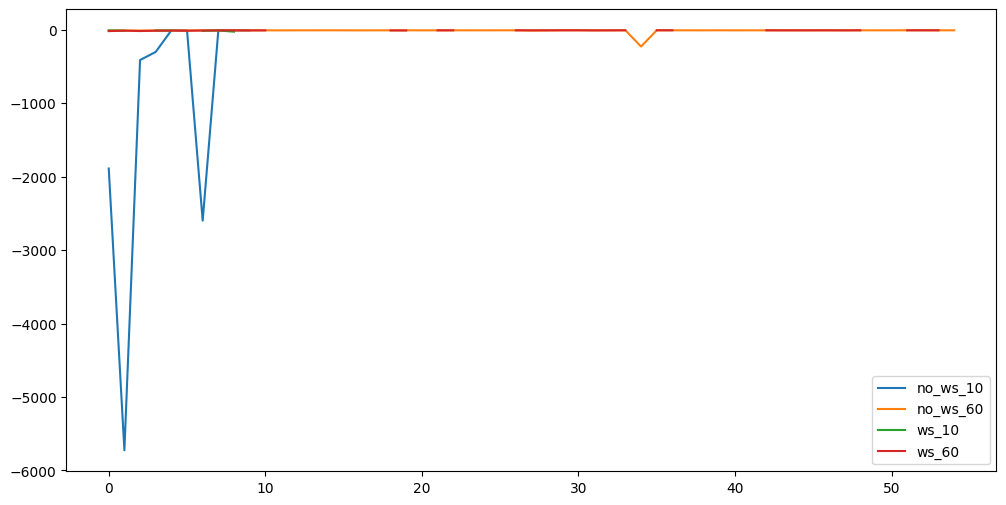

In [111]:
data = {
    "no_ws_10": no_ws_10["score"], index = pd.to_datetime
}

SyntaxError: ':' expected after dictionary key (2257115518.py, line 2)

In [68]:
import pandas as pd
import numpy as np

data = pd.read_csv("SBPort/results/gama_no_ws/bin/gama_logs_1464/evaluations.log", sep=";")
eval(data["score"][0].replace("-inf", "np.nan"))[0]

In [70]:
data_selected = data[["t_start", "score"]]
data_selected = data_selected.sort_values(by = "t_start")
data_selected["score"] = data_selected["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0])

In [71]:
#apply rolling
data_selected["t_start"] = data_selected["t_start"].str.replace(",", ".")

In [72]:
data_selected.dropna(inplace = True)

In [74]:
data_selected["t_start"] = pd.to_datetime(data_selected["t_start"], format = "%Y-%m-%d %H:%M:%S.%f")

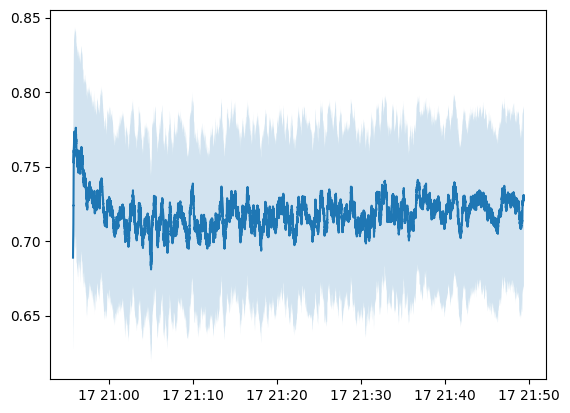

In [94]:
scores = data_selected["score"].rolling(250).mean()
error_above = data_selected["score"].rolling(250).mean() + data_selected["score"].rolling(250).std()/2
error_below = data_selected["score"].rolling(250).mean() - data_selected["score"].rolling(250).std()/2
plt.plot(data_selected["t_start"], scores)
plt.fill_between(data_selected["t_start"], error_above, error_below, interpolate = False, alpha = 0.2)

## Cluster VS All plot

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

np.printoptions(precision = 3, suppress=False)
data_multi = [
    [-1.1106710990900615, -1.081067714687917, -1.0750481005274515, -1.0898574607317928, -1.0993963377268563, -1.073427523795185, -1.0795523763175692, -1.0800708935297485],
    [-0.10779708917865569, -0.10877073470922487, -0.11390960081822528, -0.11672711916049872, -0.10601057382042141, -0.10871835186014275, -0.10745096476578812, -0.1103327467140371],
    [-0.21995638651163468, -0.25836630742495753, -0.21068014895861223, -0.3390857434923541, -0.22996475761374952, -0.25605811575569165, -0.31174334911355017, -0.2675572316574736],
    [-0.963236176011906, -1.0978064992020065, -0.9644586839426479, -1.1830404804597305, -1.0641441969763306, -0.9451733786148054, -1.0669469625746242, -1.0547073882668516],
    [-1.287253783517992, -1.2698728804870887, -1.2698952273352906, -1.2622076109655942, -1.2701622707862006, -1.2616386187101258, -1.2678326577286652, -1.2587396906636363],
    [-0.950540184384429, -1.0010387404227292, -0.9443079526086496, -1.4841152978248926, -0.9003208049019437, -0.9509634934277343, -1.2784129746734467, -1.121849052513581],
    [-0.000847134092693331, -0.0015705852278919828, -0.0007647196316105147, -0.000639153084382352, -0.0008588726880418395, -0.0014979042148376583, -0.0008300622575518321, -0.001549063664482565],
    [-0.10610402977484987, -0.10508033561158843, -0.10588774897305561, -0.10866160030370206, -0.1015306150385726, -0.10617332235710204, -0.11021258231615749, -0.10633233237460238],
    [-0.44853215769626054, -0.4429384549695352, -0.4495373190529735, -0.4518696767844571, -0.402275657481037, -0.4458150795568797, -0.4458345912787946, -0.44176718083045985],
    [-0.6919816556178666, -0.7289627214613027, -0.692493725936499, -0.6923562744861147, -0.6921172998484082, -0.6986682159694816, -0.6986127627516932, -0.692175613006901],
    [-0.7828375987760964, -0.7829937021447878, -0.8746281801171462, -0.789178493746864, -0.7834690169829815, -0.7898337782488067, -0.7871153215641679, -0.8028183975744142],
    [-0.15359414386638046, -0.15834421844676885, -0.16102704707361903, -0.1475589241375644, -0.1566499121747837, -0.15967216713180551, -0.16740895265406883, -0.16723339369037346],
    [-0.7836617322155177, -0.7273354646159783, -0.9240404512379907, -0.7194742768981343, -0.7299796937347907, -0.7118334093350075, -0.7439556350283154, -0.7456134353770281],
    [-1.1103453931525578, -1.0880731061727649, -1.0950437454341284, -1.071528778172814, -1.10137805750563, -1.0749831818298081, -1.0843319233270539, -1.0785183207252578],
    [-0.9209969692917394, -0.8406107905227115, -0.9216680100656788, -0.8392189763805001, -0.8432753370934799, -0.8428148309673953, -0.8159835806705908, -0.8411489825304992],
]

data_multi = np.array(data_multi).T*-1
data_multi = np.log10(data_multi)
# data_multi = MinMaxScaler(feature_range = (0, 0.05)).fit_transform(data_multi)

df_multi = pd.DataFrame(data_multi, columns = [str(did) for did in multi_test])

data_bin = [
    [0.9254336439598825, 0.9184544101252389, 0.9289273322627759, 0.9254664084573552, 0.917933403190915, 0.9177227799929538, 0.9257378041827107, 0.9254398690544032],
    [0.781413793777807, 0.7781849219432095, 0.7810230610392737, 0.7684781318417684, 0.7903749856744902, 0.7820862516358424, 0.7741663222005695, 0.768206262197488],
    [0.993376423304227, 0.9947986525921308, 0.9942162336170796, 0.9938933204981832, 0.9942796408798207, 0.9939796480083641, 0.9942440405942264, 0.9939376405199989],
    [0.9710297392674823, 0.9717616575872821, 0.9578829615924898, 0.9688384383458389, 0.9721453900709222, 0.9691080789392539, 0.9674404700722924, 0.9643782334601022],
    [0.949271870291611, 0.9486247693336616, 0.9588324792847173, 0.9582746224700079, 0.9503855606259431, 0.9544203688596726, 0.9517041316230476, 0.9586113581915013],
    [0.8719712424205491, 0.8806713242847444, 0.9197681415924924, 0.9189223432344192, 0.8875408192481136, 0.9040958455936169, 0.8854273148157104, 0.9194961623941875],
    [0.6881842612438023, 0.6890681298193211, 0.6871040123938731, 0.6650815245827638, 0.6875562722537074, 0.6900335477594302, 0.6899948175787494, 0.6881256152209236],
    [0.8670633869824448, 0.8674788513182717, 0.8590404193019854, 0.8605225550351024, 0.83729133192497, 0.8637369195270903, 0.8639696876085041, 0.8649194928060837],
    [0.7295321637426901, 0.7704449031074418, 0.7357241142070864, 0.7565416809998854, 0.76218610251118, 0.7548847609219126, 0.7292512326568054, 0.7216947597752552],
    [0.9352736058508555, 0.9347573026859953, 0.9333234658192214, 0.9364143920595535, 0.9329647526591499, 0.9343444633088097, 0.9350555773221305, 0.9337484944785454],
    [0.7993333333333332, 0.8051428571428572, 0.7983333333333335, 0.7864761904761904, 0.8003809523809524, 0.7973809523809525, 0.8028333333333334, 0.8031904761904762],
    [0.9981942461825575, 0.9965496123336403, 0.9989283687526906, 0.9989025303366436, 0.9943797991568308, 0.996845254279882, 0.9988674354078221, 0.9984427944935723],
    [0.8852377820818884, 0.889199195231446, 0.8855844931909974, 0.8863181388225755, 0.8826082308604717, 0.8865817605813552, 0.8860354788823326, 0.8858067954896927],
    [0.9180796362023068, 0.9279055999211276, 0.9246788754149001, 0.9217403956751781, 0.9288121118012421, 0.9289015659403859, 0.9256384863123992, 0.928056886522725],
    [0.9266666666666667, 0.9341666666666667, np.nan, 0.9141666666666668, np.nan, 0.9303333333333335, 0.9341666666666667, 0.9213333333333333],
    [0.8156440165877674, 0.8158427525849674, 0.8283476809552843, 0.816528314237632, 0.8271826515313123, 0.8185198246816416, 0.8197463572421702, 0.8282980316273028],
    [0.9932674561485968, 0.9929284828496987, 0.9942042605160241, 0.9941022764881137, 0.980670047000802, 0.9943418305368036, 0.9930561166963849, 0.9935957898906883],
    [0.5209145360237681, 0.5300948250978209, 0.5208904161236763, 0.5301391282563253, 0.5222279619132768, 0.5208905997436484, 0.5197725536398221, 0.5296414696686675],
    [0.987842745949321, 0.9866189053440466, 0.9877380770300267, 0.9879138912595972, 0.986024071116834, 0.9849468599490695, 0.9878544033810284, 0.9876192598108704],
    [0.9722692899441696, 0.9643659830218307, 0.9683996154912767, 0.9722328912003322, 0.9673524803854743, 0.9681981879917666, 0.9680469252880316, 0.9715652833832575],
    [0.9888284438315068, 0.9898117481038728, 0.9884779904139182, 0.98908154973724, 0.9898845449959722, 0.990465593152473, 0.9905702524148072, 0.9900703044253101]
]


data_bin = np.array(data_bin).T

df_bin = pd.DataFrame(data_bin, columns = [str(did) for did in binary_test])


data_regr = [
    [0.7210323820094776, 0.7405856372577677, 0.7231789982065525],
    [0.02895590779335766, np.nan, 0.028989116990634452],
    [0.00289304703583515, 0.0029238373859114095, 0.0028902802092939835],
    [4.149829321466776, 4.44184820500337, 4.201896166684984],
    [22.825446806167694, 21.143284525094657, 22.733970790099818],
    [2707.1927221563533, 4.6769855435584535, 2018.178285273742],
    [2.10185025894645, 2.0978023867527766, 2.0966129777463345],
    [0.13687915000340406, 0.13527055157834403, 0.13397839938216377],
    [0.029389199060932812, np.nan, 0.02931783011621276],
    [749.898445367129, 762.3506410365433, 751.7539448917403],
    [0.9973274636452027, 0.990401721459288, 0.9449415000418959],
    [11.947890687626266, 14.107243661080526, 12.663098925353747],
    [8.440287925655095, np.nan, 8.50267582716016],
    [0.1463062716541053, 0.14586101799927548, 0.1447246918213227],
    [25755.14190638941, 27212.058546649438, 27175.52086777254],
    [0.1975984716270574, 0.19383790864042666, 0.19817046828720306],
    [31755.645578672604, 41991.14920900784, 32889.98291038709],
]

data_regr = np.array(data_regr).T
log_data_regr = np.log10(data_regr)
#minmax scale the 6th row
log_data_regr[:, 5] = MinMaxScaler(feature_range = (0, 0.05)).fit_transform(log_data_regr[:, 5].reshape(-1, 1)).reshape(-1)
# print(log_data_regr)
# log_data_regr = StandardScaler().fit_transform(log_data_regr)
# data_regr = MinMaxScaler(feature_range = (0, 0.05)).fit_transform(data_regr)

df_regr = pd.DataFrame(log_data_regr, columns = [str(did) for did in regr_test])
print(df_regr)


        287       416       216       531     41021     42688     42726  \
0 -0.142045 -1.538263 -2.538645  0.618030  1.358419  0.050000  0.322602   
1 -0.130425       NaN -2.534047  0.647564  1.325172  0.000000  0.321765   
2 -0.140754 -1.537765 -2.539060  0.623445  1.356675  0.047691  0.321518   

      42730       422     42225       546       541     42570     42727  \
0 -0.863663 -1.531812  2.875002 -0.001162  1.077291  0.926357 -0.834737   
1 -0.868797       NaN  2.882155 -0.004189  1.149442       NaN -0.836061   
2 -0.872965 -1.532868  2.876076 -0.024595  1.102540  0.929556 -0.839457   

      42563       550       574  
0  4.410864 -0.704216  4.501821  
1  4.434761 -0.712561  4.623158  
2  4.434178 -0.702961  4.517064  


In [88]:
log_data_regr[:, 5]

array([0.05      , 0.        , 0.04769127])

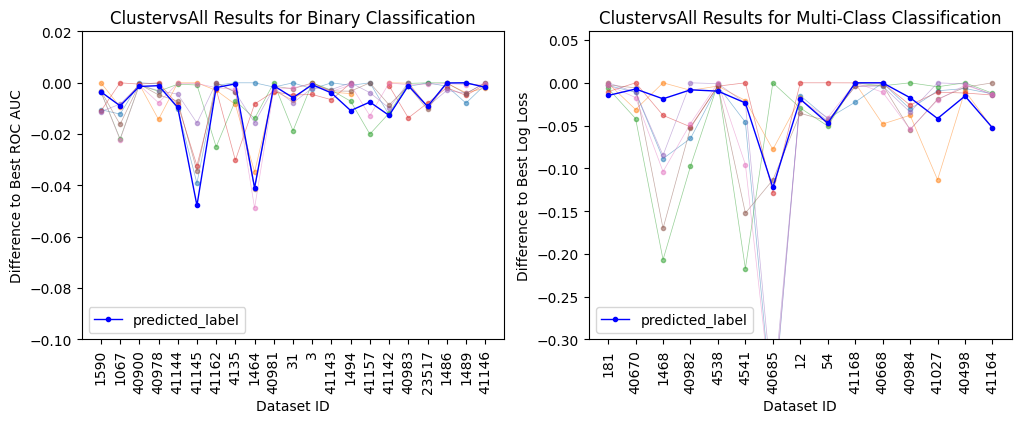

In [93]:
#create a subplot using matploblib
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
max_per_dataset_bin = df_bin.max(axis = 0)
for i in range(1, df_bin.shape[0]):
    ax1.plot(df_bin.iloc[i, :] - max_per_dataset_bin,  linewidth = 0.5, marker = "o", markersize = 3, alpha = 0.5)
ax1.plot(df_bin.iloc[0, :] - max_per_dataset_bin, color = "blue", linewidth = 1, label = "predicted_label", marker = "o", markersize = 3)
ax1.set_ylim(-0.1, 0.02)
ax1.set_title("ClustervsAll Results for Binary Classification")
ax1.set_xlabel("Dataset ID")
ax1.set_ylabel("Difference to Best ROC AUC")
ax1.set_xticks(ticks = range(0, df_bin.shape[1]), labels = [str(did) for did in binary_test], rotation = 90)
ax1.legend(loc = "lower left")

min_per_dataset_multi = df_multi.min(axis = 0)
for i in range(1, df_bin.shape[0]):
    ax2.plot(min_per_dataset_multi - df_multi.iloc[i, :], linewidth = 0.5, marker = "o", markersize = 3, alpha = 0.5)
ax2.plot(min_per_dataset_multi - df_multi.iloc[0, :], color = "blue", linewidth = 1, label = "predicted_label", marker = "o", markersize = 3)
ax2.set_ylim(-0.3, 0.06)
ax2.set_title("ClustervsAll Results for Multi-Class Classification")
ax2.set_xlabel("Dataset ID")
ax2.set_ylabel("Difference to Best Log Loss")
ax2.set_xticks(ticks = range(0, df_multi.shape[1]), labels = [str(did) for did in multi_test], rotation = 90)
ax2.legend(loc = "lower left")

# min_per_dataset_regr = df_regr.min(axis = 0)
# for i in range(1, df_regr.shape[0]):
#     ax3.plot(-np.abs(min_per_dataset_regr - df_regr.iloc[i, :]), color = "green", linewidth = 0.5, marker = "o", markersize = 3, alpha = 0.5)
# ax3.plot(min_per_dataset_regr - df_regr.iloc[0, :], color = "blue", linewidth = 1, label = "predicted_label", marker = "o", markersize = 3)
# ax3.set_ylim(-0.1, 0.02)
# ax3.set_title("ClustervsAll Results for Regression")
# ax3.set_xlabel("Dataset ID")
# ax3.set_ylabel("Difference to Best RMSE")
# ax3.set_xticks(ticks = range(0, df_regr.shape[1]), labels = [str(did) for did in regr_test], rotation = 90)
# ax3.legend(loc = "lower left")

fig.savefig("clustervsall.png", bbox_inches = "tight")



## Warm start pipeline to gama string


In [1]:
import numpy as np
from SBPort.training.fit_inference_pipeline import PortfolioTransformer
from SBPort.utils import sklearn_to_gama_str
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss, make_scorer, roc_auc_score
import category_encoders as ce

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    ExtraTreesClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PolynomialFeatures,
    RobustScaler,
    StandardScaler,
    Binarizer,
)
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.decomposition import PCA, FastICA
from sklearn.feature_selection import (
    SelectFwe,
    SelectPercentile,
    f_classif,
    VarianceThreshold,
)
from sklearn.impute import SimpleImputer

In [8]:
import skops.io as sio

bin_pipeline = sio.load("SBPort/optimal_configurations/multi/optimal_multi_heuristic_5_psize_16", trusted=True)

In [12]:
portfolios = bin_pipeline.named_steps["cluster"].portfolios

In [4]:
pipeline_strings = []
for key, value in portfolios.items():
    pipelines = [eval(pipeline) for pipeline in value]
    pipeline_strs = [sklearn_to_gama_str(pipeline) for pipeline in pipelines]
    pipeline_strings.append(pipeline_strs)
print(pipeline_strings)

## ASKL2 parsing

## FOR BIN

In [99]:
import pandas as pd

data_bin = pd.read_csv("cv_scores_bin.csv", index_col=0)
executed_results_16 = pd.DataFrame(np.sort(data_bin.values, axis=1)[:, :16], 
           columns=np.arange(1, 17)).add_prefix('Col')
max_per_row = executed_results_16.max(axis=1)
mean_per_row = executed_results_16.mean(axis=1)

In [104]:
max_per_row = max_per_row.round(3)

In [105]:
sbport_values = [0.926, 0.777, 0.994, 0.973, 0.951, 0.872, 0.688, 0.867, 0.717, 0.936, 0.796, 0.998, 0.885, 0.921, 0.817, 0.993, 0.521, 0.988, 0.972, 0.990]

In [110]:
#make a dataframe with sbport values and max_per_row
df = pd.DataFrame({"sbport": sbport_values, "max_per_row": max_per_row})

In [112]:
df["max"] = df.max(axis=1)

In [117]:
df["SBPort"] = df["sbport"] - df["max"]
df["ASKL2"] = df["max_per_row"] - df["max"]

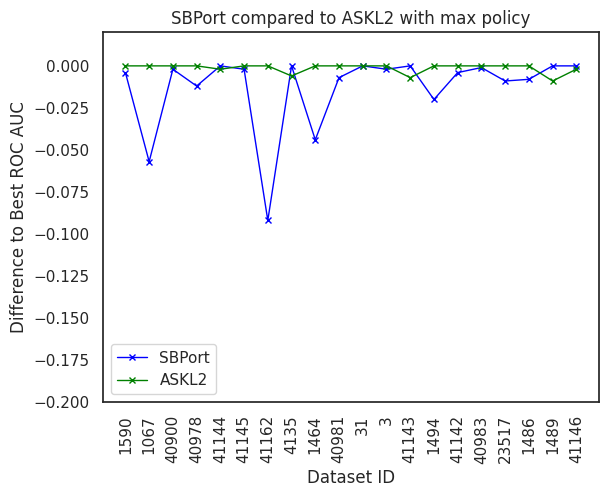

In [209]:
sns.set(style="white")
plt.plot(df["SBPort"], label="SBPort", color = "blue", linewidth = 1, marker = "x", markersize = 5)
plt.plot(df["ASKL2"], label="ASKL2", color = "green", linewidth = 1, marker = "x", markersize = 5)
plt.ylim(-0.2, 0.02)
plt.title("SBPort compared to ASKL2 with max policy")
plt.ylabel("Difference to Best ROC AUC")
plt.xlabel("Dataset ID")
plt.xticks(ticks = range(0, df.shape[0]), labels = [str(did) for did in binary_test], rotation = 90)
plt.legend(loc = "lower left")
plt.savefig("sbport_vs_askl2_max.png", bbox_inches = "tight")


In [128]:
sbport_values_stable = [
    [0.912, 0.916, 0.909, 0.915, 0.914, 0.913, 0.894, 0.882, 0.921, 0.862, 0.926, 0.908, 0.863, 0.905, 0.914, 0.911],
    [0.753, 0.766, 0.753, 0.754, 0.757, 0.775, 0.762, 0.760, 0.763, 0.726, 0.753, 0.755, 0.764, 0.762, 0.740, 0.732],
    [0.992, 0.993, 0.987, 0.993, 0.992, 0.986, 0.990, 0.992, 0.985, 0.991, 0.992, 0.993, 0.988, 0.993, 0.994, 0.987],
    [0.957, float('nan'), 0.955, float('nan'), 0.949, 0.958, 0.941, 0.965, 0.956, 0.966, 0.956, 0.970, float('nan'), float('nan'), 0.958, 0.960],
    [0.940, 0.935, 0.951, float('nan'), 0.949, 0.950, 0.916, 0.948, 0.950, 0.948, 0.952, 0.929, float('nan'), float('nan'), 0.943, 0.949],
    [float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), float('nan'), 0.865, float('nan'), float('nan'), 0.888, float('nan'), 0.862, 0.846, float('nan')],
    [0.675, 0.661, 0.661, float('nan'), 0.659, 0.662, 0.687, 0.663, 0.660, 0.667, 0.663, 0.661, float('nan'), float('nan'), 0.665, 0.662],
    [0.838, 0.857, 0.863, 0.859, 0.860, 0.863, 0.751, 0.864, 0.863, 0.862, 0.863, 0.863, 0.858, 0.855, 0.862, 0.863],
    [0.597, 0.694, 0.576, 0.666, 0.644, 0.638, 0.622, 0.623, 0.681, 0.615, 0.635, 0.718, 0.615, 0.568, 0.647, 0.603],
    [0.930, 0.927, 0.924, 0.935, 0.925, 0.930, 0.921, 0.922, 0.929, 0.927, 0.928, 0.929, 0.928, 0.931, 0.931, 0.926],
    [0.787, 0.798, 0.789, 0.783, 0.792, 0.797, 0.765, 0.763, 0.770, 0.758, 0.753, 0.788, 0.751, 0.794, 0.793, 0.790],
    [0.997, 0.998, 0.997, 0.998, 0.997, 0.998, 0.995, 0.998, 0.997, 0.999, 0.998, 0.994, 0.999, 0.998, 0.997, 0.999],
    [0.877, 0.876, 0.873, 0.882, 0.864, 0.871, 0.862, 0.870, 0.871, 0.885, 0.884, 0.885, 0.884, 0.874, 0.874, 0.878],
    [0.918, 0.920, 0.919, 0.917, 0.917, 0.916, 0.917, 0.912, 0.906, 0.909, 0.908, 0.904, 0.910, 0.919, 0.918, 0.915],
    [0.819, float('nan'), 0.816, float('nan'), 0.813, 0.814, 0.811, 0.818, 0.809, 0.814, 0.816, 0.807, float('nan'), float('nan'), 0.811, 0.812],
    [0.993, 0.994, 0.993, 0.991, 0.990, 0.989, 0.985, 0.985, 0.985, 0.987, 0.988, 0.961, 0.987, 0.992, 0.993, 0.985],
    [0.519, 0.517, 0.518, float('nan'), 0.518, 0.519, 0.529, 0.516, 0.517, 0.520, 0.519, 0.513, float('nan'), 0.520, 0.519, 0.518],
    [0.984, 0.984, 0.984, 0.985, 0.985, 0.985, 0.985, 0.984, 0.985, 0.988, 0.984, 0.984, 0.984, 0.985, 0.983, 0.987],
    [0.962, 0.956, 0.966, 0.949, 0.962, 0.961, 0.969, 0.971, 0.935, 0.971, 0.957, 0.921, 0.973, 0.968, 0.960, 0.961],
    [0.985, 0.984, 0.985, 0.987, 0.986, 0.984, 0.988, 0.988, 0.987, 0.986, 0.985, 0.982, 0.986, 0.985, 0.984, 0.986]
    ]


In [131]:
mean_values_stable = np.nanmean(sbport_values_stable, axis=1)

In [132]:
mean_values_stable_askl2 = np.nanmean(executed_results_16, axis = 1)

In [149]:
df_stable = pd.DataFrame({'SBPort': mean_values_stable, 'ASKL2': mean_values_stable_askl2})

In [150]:
df_stable["winner"] = df_stable["SBPort"].values > df_stable["ASKL2"].values

In [175]:
stable_df_sbport = pd.DataFrame(np.array(sbport_values_stable).T)

In [269]:
stable_df_sbport.shape

(16, 20)

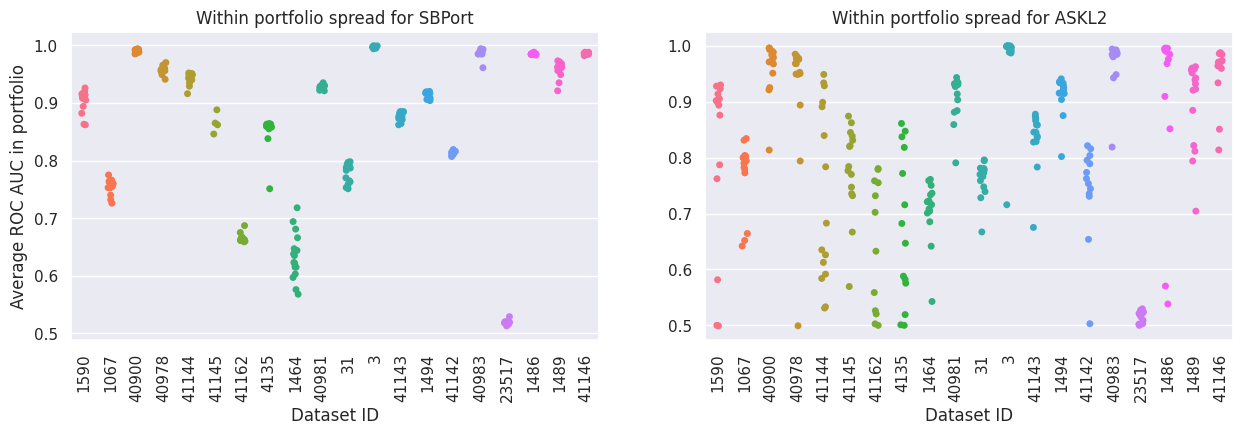

In [285]:
import seaborn as sns

# sns.set(style="whitegrid")
#give me different options for style
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
sns.stripplot(data=stable_df_sbport, ax = ax1)
ax1.set_title("Within portfolio spread for SBPort")
ax1.set_xlabel("Dataset ID")
ax1.set_ylabel("Average ROC AUC in portfolio")
ax1.set_xticks(ticks = range(0, stable_df_sbport.shape[1]), labels = [str(did) for did in binary_test], rotation = 90)

sns.stripplot(data=executed_results_16.T, ax = ax2)
ax2.set_title("Within portfolio spread for ASKL2")
ax2.set_xlabel("Dataset ID")

ax2.set_xticks(ticks = range(0, stable_df_sbport.shape[1]), labels = [str(did) for did in binary_test], rotation = 90)

plt.savefig("sbport_askl2_stable.png", bbox_inches='tight')

#create a boxplot from sbport_values_stable

In [210]:
data_multi = pd.read_csv("cv_scores_multi.csv",index_col=0)

In [230]:
data_multi = pd.DataFrame(np.sort(data_multi.values, axis=1)[:, :16], 
           columns=np.arange(1, 17)).add_prefix('Col')
data_askl_multi = data_multi.loc[0:8]*-1

In [236]:
data_askl_multi

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16
0,2.051912,1.663604,1.590660,1.319070,1.292040,1.271903,1.258288,1.222524,1.208907,1.174730,1.171999,1.139468,1.131199,1.125805,1.122743,1.081421
1,1.383793,0.654971,0.622339,0.614868,0.541862,0.431904,0.367188,0.365950,0.337995,0.197260,0.184798,0.175652,0.167588,0.135482,0.128664,0.123420
2,1.881279,1.180266,1.163256,1.045018,0.924956,0.713297,0.606343,0.535659,0.508360,0.506467,0.385326,0.340951,0.316068,0.298566,0.224346,NaN
3,2.426577,1.370196,1.176562,0.842747,0.792716,0.725942,0.709964,0.707934,0.700293,0.689775,0.661750,0.585172,0.564734,0.535745,0.533349,0.528140
4,8.438574,1.886961,1.682793,1.539835,1.338190,1.309204,1.252356,1.191368,1.124128,0.998698,0.924695,0.882004,0.862214,0.843097,0.840303,0.825418
5,17.319369,8.138449,2.701506,1.076391,1.007332,0.991960,0.949975,0.939067,0.919591,0.884420,0.836935,0.835768,0.834566,NaN,NaN,NaN
6,10.089713,8.125855,2.444301,1.885711,0.227251,0.174891,0.159780,0.043542,0.015265,0.003840,0.002281,0.001074,0.000849,0.000731,0.000721,0.000459
7,1.315972,0.436916,0.239286,0.231118,0.219417,0.211118,0.203064,0.202047,0.192315,0.178318,0.156844,0.155037,0.137503,0.134135,0.131588,0.116609
8,7.674841,1.440346,0.860612,0.829050,0.652190,0.598603,0.593756,0.543794,0.533050,0.526687,0.521353,0.509642,0.508137,0.465633,0.455079,0.451764


In [237]:
stable_values_multi = np.array([
    [-1.531, -0.112, -0.416, -1.138, -1.424, -1.504, -12.87, -0.104, -0.451, np.nan, -0.876, -0.165, -0.879, -1.667, np.nan],
    [-1.504, -0.115, -0.317, -1.112, -1.418, -0.99, -9.333, -0.11, -0.463, np.nan, -0.88, -0.166, -0.872, -1.365, -0.948],
    [-1.36, -0.109, -0.409, -1.131, -1.389, -1.521, -18.309, -0.12, -0.478, -0.692, -0.832, -0.183, -0.832, -1.315, -0.932],
    [-1.297, -0.113, -0.411, -1.118, -1.343, -1.589, -21.332, -0.231, -0.459, -0.7, -0.805, -0.232, -0.8, -1.175, np.nan],
    [-1.29, -0.115, -0.362, -1.163, -1.351, -1.399, -16.695, -0.113, -0.527, np.nan, -0.812, -0.176, -0.79, -1.167, -0.955],
    [-1.309, -0.116, -0.416, -1.158, -1.321, -1.662, -0.197, -0.122, -0.453, np.nan, -0.798, -0.178, -0.815, -1.172, -0.929],
    [-1.341, -0.111, -0.331, -1.259, -1.334, -1.641, -15.183, -0.212, -0.479, np.nan, -0.811, -0.195, -0.883, -1.183, -0.956],
    [-1.383, -0.114, -0.342, -1.274, -1.462, -1.717, -9.256, -0.106, -0.541, -0.692, -0.866, -0.161, -0.974, -1.287, -0.933],
    [-1.54, -0.109, -0.278, -1.225, np.nan, -1.046, -8.1, -0.117, -0.446, np.nan, -1.612, -0.167, -0.918, -1.612, -0.939],
    [-1.201, -0.177, -0.496, -1.283, -1.406, -5.927, -0.001, -0.119, -0.51, -0.715, -1.291, -0.186, -1.08, -1.291, -1.11],
    [-1.211, -0.114, -0.276, -1.247, -1.42, -1.06, -8.679, -0.201, -0.516, -0.715, -1.312, -0.226, -1.089, -1.312, -0.961],
    [-1.108, -0.149, -0.259, -0.979, -1.287, -0.943, -21.298, -0.192, -0.532, np.nan, -1.127, -0.211, -2.501, -1.127, -0.917],
    [-1.177, -0.111, -0.219, -1.175, -1.346, -1.405, -17.293, -0.254, -0.517, np.nan, -1.145, -0.233, -2.442, -1.145, -0.981],
    [-1.661, -0.184, np.nan, -1.225, -1.372, np.nan, -0.002, -0.114, -0.496, np.nan, -1.603, -0.325, -0.955, -1.603, np.nan],
    [-1.17, -0.115, -0.312, -1.089, -1.316, -1.265, -22.344, -0.114, -0.518, -0.73, -1.179, -0.325, -0.893, -1.179, np.nan],
    [-1.501, -0.219, -0.363, -1.178, -1.334, -1.32, -0.002, -0.126, -0.522, np.nan, -1.537, -0.306, -0.897, -1.537, -0.954]
]).T[:9]*-1


In [238]:
df_max_multi = pd.DataFrame({"sbport": np.max(stable_values_multi), "askl2": data_askl_multi.values})

ValueError: Per-column arrays must each be 1-dimensional

In [241]:
df_multi_min = pd.DataFrame({"sbport": np.nanmin(stable_values_multi, axis = 1), "askl2": np.nanmin(data_askl_multi.values, axis = 1)})

In [242]:
df_multi_min["best"] = df_multi_min.min(axis = 1)

In [258]:
df_multi_min["SBPort"] = -np.abs(df_multi_min["sbport"] - df_multi_min["best"])

In [259]:
df_multi_min["ASKL2"] = -np.abs(df_multi_min["askl2"] - df_multi_min["best"])

In [260]:
df_multi_min

,sbport,askl2,best,SBPort,ASKL2
0,1.108,1.081421,1.081421,-0.026579,-0.000000
1,0.109,0.123420,0.109000,-0.000000,-0.014420
2,0.219,0.224346,0.219000,-0.000000,-0.005346
3,0.979,0.528140,0.528140,-0.450860,-0.000000
4,1.287,0.825418,0.825418,-0.461582,-0.000000
5,0.943,0.834566,0.834566,-0.108434,-0.000000
6,0.001,0.000459,0.000459,-0.000541,-0.000000
7,0.104,0.116609,0.104000,-0.000000,-0.012609
8,0.446,0.451764,0.446000,-0.000000,-0.005764


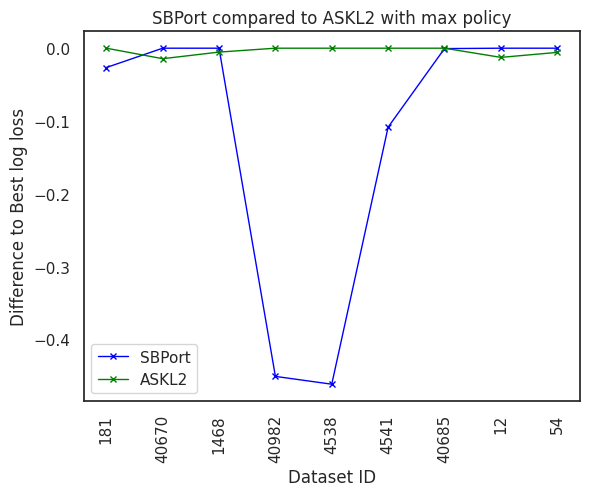

In [278]:
sns.set(style="white")
plt.plot(df_multi_min["SBPort"], label="SBPort", color = "blue", linewidth = 1, marker = "x", markersize = 5)
plt.plot(df_multi_min["ASKL2"], label="ASKL2", color = "green", linewidth = 1, marker = "x", markersize = 5)
# plt.ylim(-0.2, 0.02)
plt.title("SBPort compared to ASKL2 with max policy")
plt.ylabel("Difference to Best log loss")
plt.xlabel("Dataset ID")
plt.xticks(ticks = range(0, len(multi_test[:9])), labels = [str(did) for did in multi_test[:9]], rotation = 90)
plt.legend(loc = "lower left")
plt.savefig("sbport_vs_askl2_max_multi.png", bbox_inches = "tight")

In [265]:
df_data_askl_multi = pd.DataFrame(data_askl_multi)
df_stable_multi = pd.DataFrame(stable_values_multi)

In [270]:
df_stable_multi.shape

(9, 16)

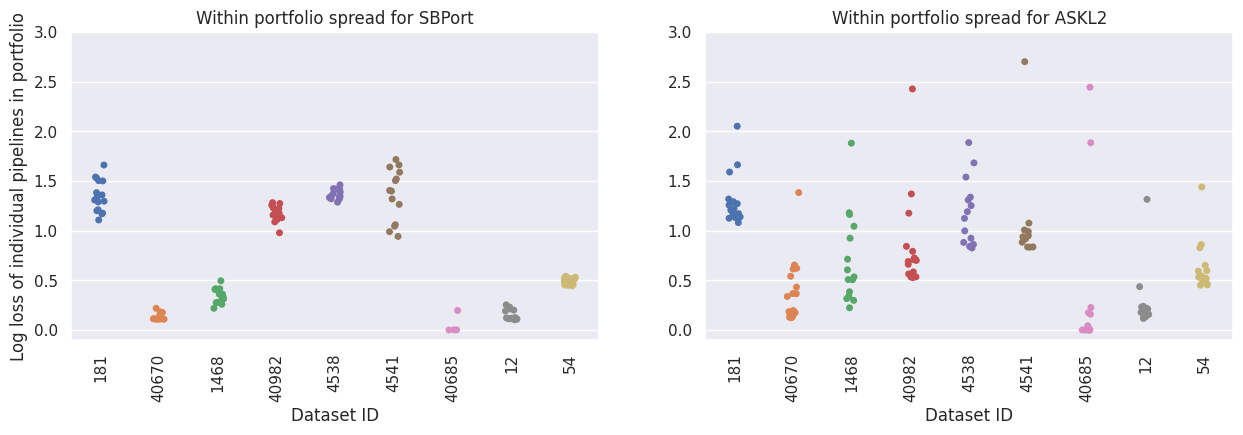

In [279]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
sns.stripplot(data=df_stable_multi.T, ax = ax1)
ax1.set_title("Within portfolio spread for SBPort")
ax1.set_xlabel("Dataset ID")
ax1.set_ylabel("Log loss of individual pipelines in portfolio")
ax1.set_ylim(-0.1, 3)
ax1.set_xticks(ticks = range(0, df_stable_multi.T.shape[1]), labels = [str(did) for did in multi_test[:9]], rotation = 90)

sns.stripplot(data=df_data_askl_multi.T, ax = ax2)
ax2.set_title("Within portfolio spread for ASKL2")
ax2.set_xlabel("Dataset ID")
ax2.set_ylim(-0.1, 3)

ax2.set_xticks(ticks = range(0, df_data_askl_multi.T.shape[1]), labels = [str(did) for did in multi_test[:9]], rotation = 90)

plt.savefig("sbport_askl2_stable_multi.png", bbox_inches='tight')

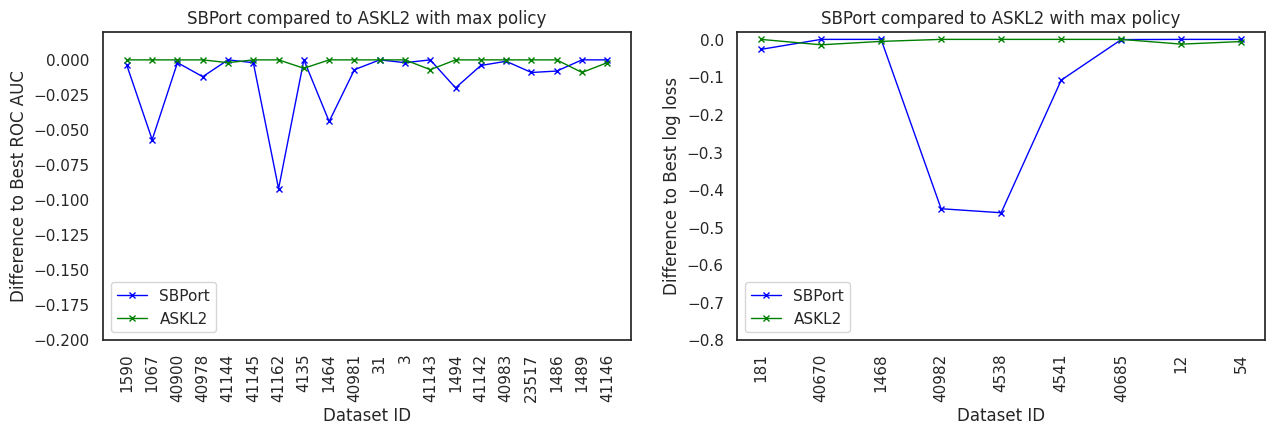

In [284]:

sns.set_style("white")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))


ax1.plot(df["SBPort"], label="SBPort", color = "blue", linewidth = 1, marker = "x", markersize = 5)
ax1.plot(df["ASKL2"], label="ASKL2", color = "green", linewidth = 1, marker = "x", markersize = 5)
ax1.set_ylim(-0.2, 0.02)
ax1.set_title("SBPort compared to ASKL2 with max policy")
ax1.set_ylabel("Difference to Best ROC AUC")
ax1.set_xlabel("Dataset ID")
ax1.set_xticks(ticks = range(0, df.shape[0]), labels = [str(did) for did in binary_test], rotation = 90)
ax1.legend(loc = "lower left")

ax2.plot(df_multi_min["SBPort"], label="SBPort", color = "blue", linewidth = 1, marker = "x", markersize = 5)
ax2.plot(df_multi_min["ASKL2"], label="ASKL2", color = "green", linewidth = 1, marker = "x", markersize = 5)
plt.ylim(-0.8, 0.02)
ax2.set_title("SBPort compared to ASKL2 with max policy")
ax2.set_ylabel("Difference to Best log loss")
ax2.set_xlabel("Dataset ID")
ax2.set_xticks(ticks = range(0, len(multi_test[:9])), labels = [str(did) for did in multi_test[:9]], rotation = 90)
ax2.legend(loc = "lower left")
plt.savefig("sbport_vs_askl2_max.png", bbox_inches = "tight")
# plt.savefig("sbport_vs_askl2_max_multi.png", bbox_inches = "tight")
# plt.savefig("sbport_vs_askl2_max.png", bbox_inches = "tight")

In [50]:
import skops.io as sio
from SBPort.training.fit_inference_pipeline import PortfolioTransformer

pipe = sio.load("SBPort/optimal_configurations/multi/optimal_multi_heuristic_8_psize_16", trusted=True)

In [48]:
pipe.named_steps["cluster"].portfolios

{'0': ["Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',PolynomialFeatures(include_bias=False)),('1',FastICA(tol=0.1,whiten='unit-variance')),('0',LinearSVR(C=5.0,dual=False,epsilon=0.0001,loss='squared_epsilon_insensitive'))])",
  "Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Binarizer(threshold=0.55)),('1',PolynomialFeatures(include_bias=False)),('0',LinearSVR(C=10.0,epsilon=0.0001,tol=0.001))])",
  "Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',VarianceThreshold(threshold=0.5)),('0',LinearSVR(C=0.1,epsilon=0.001,loss='squared_epsilon_insensitive',tol=0.1))])",
  "Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Binarizer(threshold=0.7000000000000001)),('1',MinMaxScaler()),('0',AdaBoostRegressor(learning_rate=0.1,loss='exponential',n_estimators=100))])",
  "Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Binarizer(threshold=0.55)),('1',PolynomialFeatures(include_bias=False)),(

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.metrics._scorer import _ProbaScorer

from sklearn.model_selection import cross_val_score
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import category_encoders as ce

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    ExtraTreesClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PolynomialFeatures,
    RobustScaler,
    StandardScaler,
    Binarizer,
)
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.decomposition import PCA, FastICA
from sklearn.feature_selection import (
    SelectFwe,
    SelectPercentile,
    f_classif,
    VarianceThreshold,
)

from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PolynomialFeatures,
    RobustScaler,
    StandardScaler,
    Binarizer,
)
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.decomposition import PCA, FastICA
from sklearn.feature_selection import (
    SelectFwe,
    SelectPercentile,
    VarianceThreshold,
    f_regression,
)

from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import (
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    RandomForestRegressor,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.impute import SimpleImputer

In [52]:
# vals = [0, 1, 2, -1]
# pipeline_dict = {str(i): [] for i in vals}

# for i in vals:
#     pipelines = [sklearn_to_gama_str(eval(p), task = "regression") for p in pipe.named_steps["cluster"].portfolios[str(i)]]

#     pipeline_dict[str(i)] = pipelines

# import json

# with open("portfolios/regr_heuristic_optics_psize_16.json", "w") as f:
#     json.dump(pipeline_dict, f, indent = 4)

In [53]:
length_portfolio = len(pipe.named_steps["cluster"].portfolios)
pipeline_dict = {str(i): [] for i in range(length_portfolio)}

for i in range(len(pipe.named_steps["cluster"].portfolios)):
    pipelines = [sklearn_to_gama_str(eval(p), task = "regression") for p in pipe.named_steps["cluster"].portfolios[str(i)]]

    pipeline_dict[str(i)] = pipelines

import json

with open("portfolios/multi_heuristic_8_psize_16.json", "w") as f:
    json.dump(pipeline_dict, f, indent = 4)

KeyError: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

In [14]:
pipelines = [sklearn_to_gama_str(eval(p), task = "regression") for p in pipe]

In [12]:
from SBPort.utils import sklearn_to_gama_str

In [20]:
#print the items of pipelines with a space

pipelines

['RandomForestRegressor(PolynomialFeatures(data, PolynomialFeatures.interaction_only=False, PolynomialFeatures.degree=2, PolynomialFeatures.include_bias=False), min_samples_split=2, RandomForestRegressor.n_estimators=100, RandomForestRegressor.bootstrap=True, RandomForestRegressor.max_features=0.35000000000000003, min_samples_leaf=2)',
 'LassoLarsCV(PolynomialFeatures(data, PolynomialFeatures.interaction_only=False, PolynomialFeatures.degree=2, PolynomialFeatures.include_bias=False), LassoLarsCV.normalize=True)',
 'ExtraTreesRegressor(PolynomialFeatures(data, PolynomialFeatures.interaction_only=False, PolynomialFeatures.degree=2, PolynomialFeatures.include_bias=False), min_samples_split=5, ExtraTreesRegressor.n_estimators=100, ExtraTreesRegressor.bootstrap=False, ExtraTreesRegressor.max_features=0.8500000000000001, min_samples_leaf=3)',
 'LassoLarsCV(MinMaxScaler(PolynomialFeatures(data, PolynomialFeatures.interaction_only=False, PolynomialFeatures.degree=2, PolynomialFeatures.include_